<a href="https://colab.research.google.com/github/panosK91/Heart-Disease-Prediction-using-Logistic-Regression/blob/main/Heart_Disease_Prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset preview and shape after preprocessing:
   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0

<ipython-input-4-912d54b385a8>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")


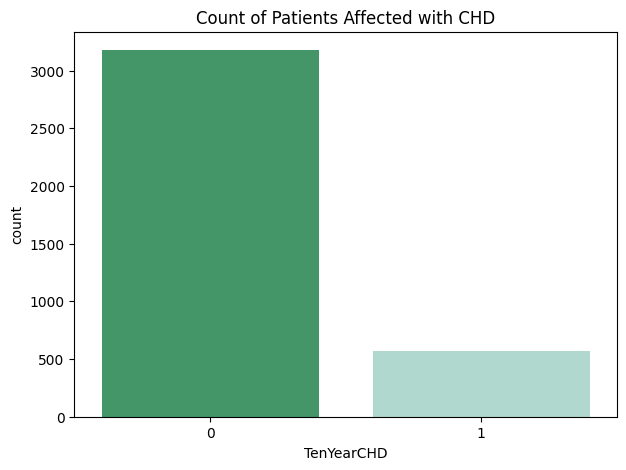

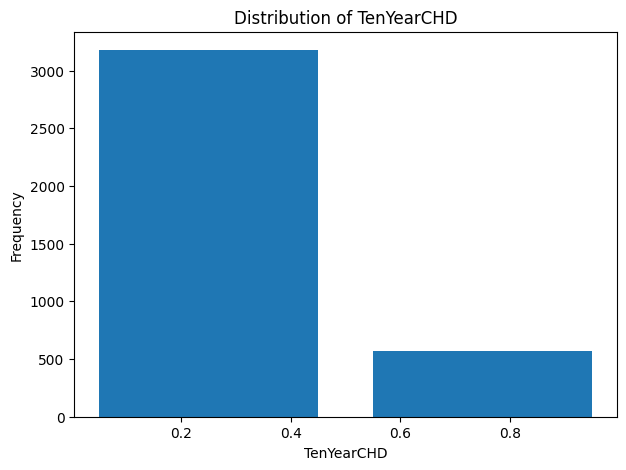


Accuracy of the model is = 0.8490230905861457


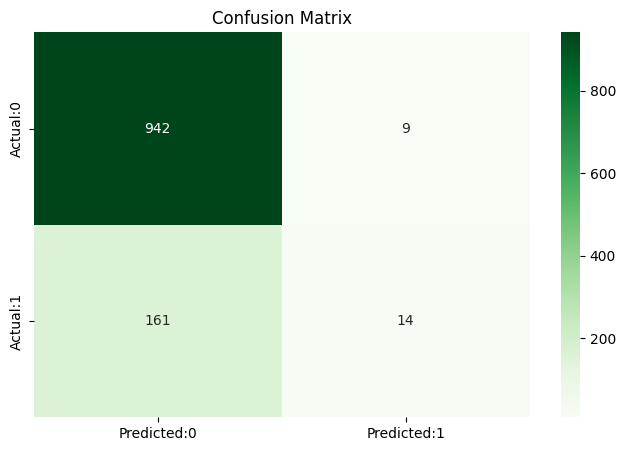


The details for matrix are:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
disease_df = pd.read_csv("framingham.csv")

# Drop the 'education' column as it's not needed for analysis
disease_df.drop(['education'], inplace=True, axis=1)

# Rename 'male' column to 'Sex_male' for clarity
disease_df.rename(columns={'male': 'Sex_male'}, inplace=True)

# Remove rows with NaN / NULL values
disease_df.dropna(axis=0, inplace=True)

# Display the first 5 rows and the shape of the dataset
print("Dataset preview and shape after preprocessing:")
print(disease_df.head(), disease_df.shape)

# Count the number of occurrences of each class in 'TenYearCHD'
print("\nTenYearCHD value counts:")
print(disease_df.TenYearCHD.value_counts())

# Define feature matrix X and target vector y
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# Normalize the feature matrix
X = preprocessing.StandardScaler().fit(X).transform(X)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Print the shapes of the train and test sets
print('\nTrain set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

# Plot the count of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.title("Count of Patients Affected with CHD")
plt.show()

# Plot the distribution of 'TenYearCHD'
plt.figure(figsize=(7, 5))
disease_df['TenYearCHD'].plot(kind='hist', bins=2, rwidth=0.8)
plt.title("Distribution of TenYearCHD")
plt.xlabel("TenYearCHD")
plt.ylabel("Frequency")
plt.show()

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
print('\nAccuracy of the model is =', accuracy_score(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix")
plt.show()

# Display the detailed classification report
print('\nThe details for matrix are:')
print(classification_report(y_test, y_pred))
